计算资源初始化中，请等待...
计算资源初始化完成.


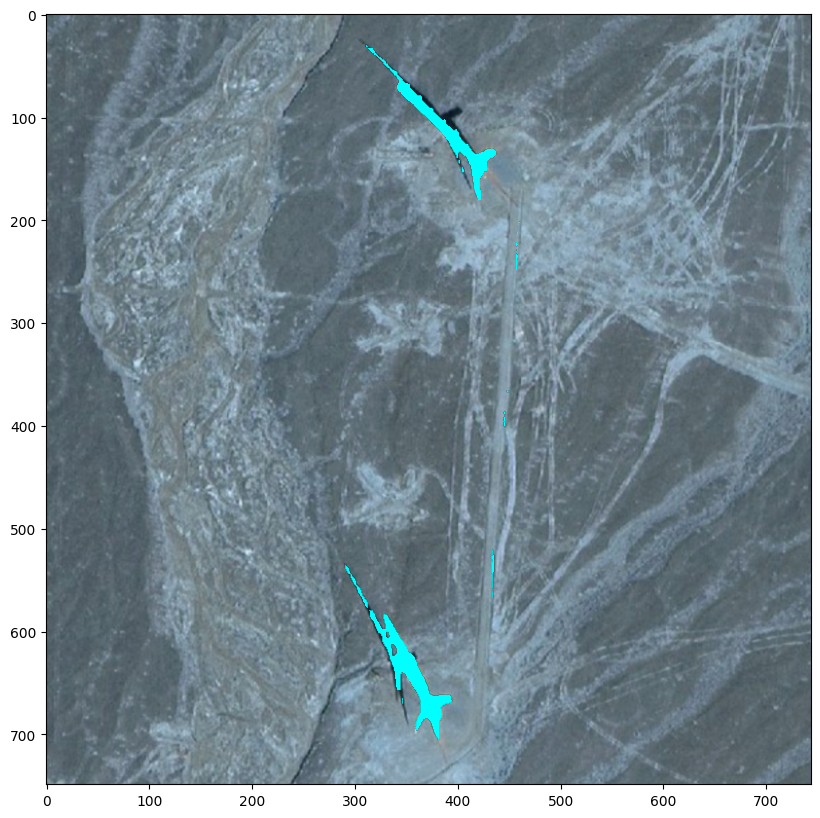

2023-10-19 11:49:11,831 - openapi - INFO - 删除图形提示 20631697686927149223377
INFO:openapi:删除图形提示 20631697686927149223377


True


In [12]:
from matplotlib import pyplot as plt
from aiearth.openapi.utils import show_mask
from aiearth.openapi.models import GetAiesegVisualPromptRequest, DeleteAiesegVisualPromptRequest
from aiearth.openapi import build_client
import aie
aie.Authenticate(access_key_id="LTAI5tP53QyofRgfxZi1vyon", access_key_secret="cXP5uxZO4ZabxA9bYo6gy40CfiULeH")
aie.Initialize()
client = build_client('LTAI5tP53QyofRgfxZi1vyon', 'cXP5uxZO4ZabxA9bYo6gy40CfiULeH')

request = GetAiesegVisualPromptRequest(name_like="test1", page_size=100)

resp = client.get_aieseg_visual_prompt(request)

if not resp.body or len(resp.body.list) < 1:
    raise ValueError("没有找到")

for l in resp.body.list:
    plt.figure(figsize=(10, 10))
    plt.imshow(l.bg_image)
    show_mask(l.mask_image, plt.gca())
    plt.show()

# 删除一个
delete_request = DeleteAiesegVisualPromptRequest(prompt_id=resp.body.list[0].prompt_id)
delete_response = client.delete_aieseg_visual_prompt(delete_request)
print(delete_response.body.deleted)

计算资源初始化中，请等待...
计算资源初始化完成.


Uploading bytes: 0.00B [00:01, ?B/s]


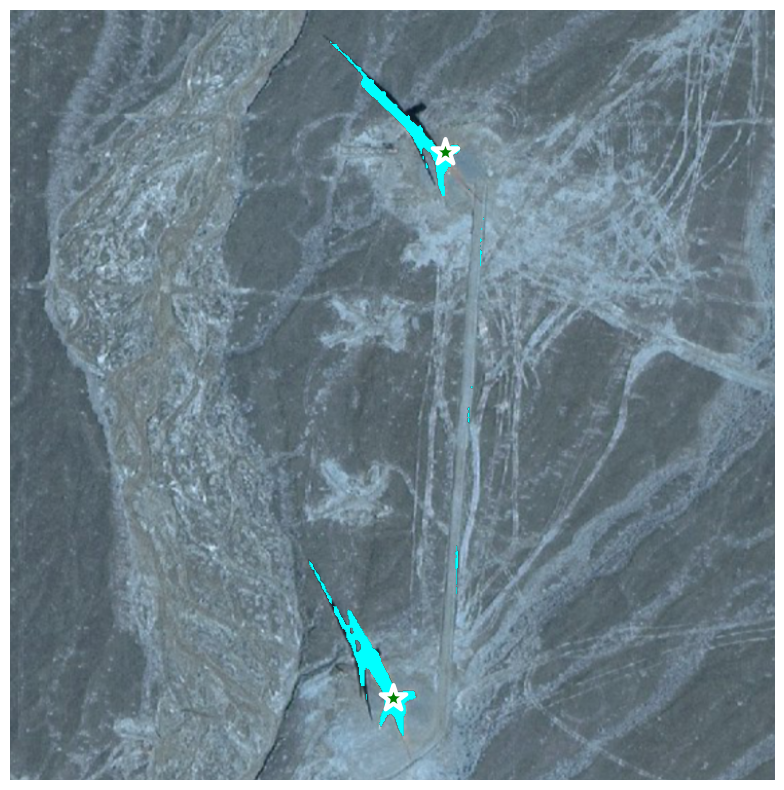

Uploading C:\Users\86135\AppData\Local\Temp\tmphmp9gqrh.png: 100%|██████████████████| 953k/953k [00:00<00:00, 1.41MB/s]
Uploading C:\Users\86135\AppData\Local\Temp\tmphhcii7hc.png: 100%|████████████████| 3.66k/3.66k [00:00<00:00, 29.0kB/s]


{'PromptId': '36691697687389149223377', 'PromptName': 'test1', 'CreateDatetime': datetime.datetime(2023, 10, 19, 11, 49, 49, 966000), 'ModifiedDatetime': datetime.datetime(2023, 10, 19, 11, 49, 49, 966000), 'BgImage': array([[[104, 120, 127],
        [ 97, 113, 119],
        [ 90, 106, 112],
        ...,
        [ 85, 101, 108],
        [ 86, 101, 108],
        [ 87, 101, 109]],

       [[105, 121, 128],
        [ 95, 111, 118],
        [ 87, 103, 110],
        ...,
        [ 85, 100, 107],
        [ 85, 100, 107],
        [ 87, 100, 108]],

       [[ 97, 113, 120],
        [ 91, 107, 114],
        [ 86, 102, 109],
        ...,
        [ 85,  99, 107],
        [ 84,  97, 105],
        [ 85,  98, 106]],

       ...,

       [[119, 137, 146],
        [128, 146, 155],
        [133, 151, 159],
        ...,
        [ 89, 102, 110],
        [ 88, 101, 110],
        [ 88, 101, 110]],

       [[112, 131, 139],
        [121, 140, 148],
        [129, 148, 156],
        ...,
        [ 86,  99, 10

In [14]:
import aie
from aiearth.openapi import build_client
from aiearth.openapi.utils import show_mask, show_points, read_from_url
from aiearth.openapi.models import GenerateAieSegVisualPromptRequest, PublishAiesegVisualPromptRequest
from aiearth.openapi.example import load_image_example
from matplotlib import pyplot as plt
import cv2
import numpy
from PIL import Image

aie.Authenticate(access_key_id="LTAI5tP53QyofRgfxZi1vyon", access_key_secret="cXP5uxZO4ZabxA9bYo6gy40CfiULeH")
aie.Initialize()
client = build_client('LTAI5tP53QyofRgfxZi1vyon', 'cXP5uxZO4ZabxA9bYo6gy40CfiULeH')
imagepath = "D:/image/example.png"
#img = Image.open(imagepath)
#img_array = nnmpy.array(img)
img_array = cv2.imread(imagepath)
points = [[372, 669],[423,138]]
labels = [1,1]

generate_aieseg_prompt_req = GenerateAieSegVisualPromptRequest(image=img_array, points=points, point_labels=labels)
generate_aieseg_prompt_resp = client.generate_aieseg_visual_prompt(generate_aieseg_prompt_req)
mask = generate_aieseg_prompt_resp.body.mask
plt.figure(figsize=(10, 10))
plt.imshow(img_array)
show_mask(mask, plt.gca())
show_points(points, labels, plt.gca())
plt.axis('off')
plt.show()
publish_aieseg = PublishAiesegVisualPromptRequest(bg_image=img_array, mask_image=mask, name="test1")
publish_aieseg_resp = client.publish_aieseg_prompt(publish_aieseg)
print(publish_aieseg_resp.body.visual_prompt.to_map())


In [16]:
import os
import tempfile
import aie
import requests
#获取prompt_id
from aiearth.openapi.example import load_image_example
from aiearth.openapi.utils import read_from_url
from time import sleep
from aiearth.openapi.models import ListUserRasterDatasRequest, PublishLocalTiffRequest,ListUserMapServiceDatasRequest
from aiearth.openapi.enums import PublishStatus, AiesegJobType
from aiearth.openapi.models import GetAiesegVisualPromptRequest, \
    GenerateAieSegVisualPromptRequest, PublishAiesegVisualPromptRequest, CreateAiesegJobRequest, RasterParam,MapServiceParam
from aiearth.openapi import build_client
aie.Authenticate(access_key_id="LTAI5tP53QyofRgfxZi1vyon", access_key_secret="cXP5uxZO4ZabxA9bYo6gy40CfiULeH")
aie.Initialize()
client = build_client('LTAI5tP53QyofRgfxZi1vyon', 'cXP5uxZO4ZabxA9bYo6gy40CfiULeH')
prompt_name = "test1"
get_aieseg_prompt_request = GetAiesegVisualPromptRequest(name_like=prompt_name)
get_aieseg_prompt_resp = client.get_aieseg_visual_prompt(get_aieseg_prompt_request)
if len(get_aieseg_prompt_resp.body.list) > 0:
        prompt_id = get_aieseg_prompt_resp.body.list[0].prompt_id  #h获取id
print(prompt_id)

计算资源初始化中，请等待...
计算资源初始化完成.
36691697687389149223377
